# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import scipy.stats as stats
import seaborn as sns
import math

df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
# Initial EDA: look at dataframe structure, 
# then look at histogram and boxplot of each variable.
print(df.head())
print(' ')
print(df.tail())
print(' ')
df.info()

   temperature gender  heart_rate
0         99.3      F        68.0
1         98.4      F        81.0
2         97.8      M        73.0
3         99.2      F        66.0
4         98.0      F        73.0
 
     temperature gender  heart_rate
125         96.3      M        70.0
126         97.7      M        77.0
127         98.2      F        73.0
128         97.9      M        72.0
129         98.7      F        59.0
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


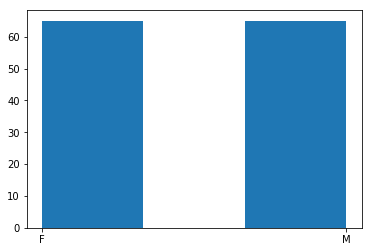

# of females:  65 # of males:  65


In [47]:
plt.hist(df['gender'],bins=3)
plt.show()
females = df[df['gender'] == 'F']
males = df[df['gender'] == 'M']
print('# of females: ',len(females), '# of males: ',len(males))

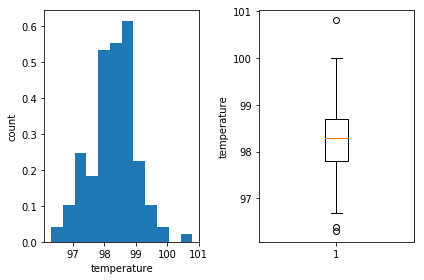

mean temperature:  98.24923076923078
sample std deviation:  0.7303577789050377
sample - 2 std deviations:  98.23462361365267
sample + 2 std deviations:  98.26383792480888


In [73]:
mean_temp = np.mean(df.temperature)
std_temp = np.std(df.temperature)
plt.subplot(1,2,1)
plt.xlabel('temperature')
plt.ylabel('count')
plt.hist(df['temperature'],bins=12,normed=True)
plt.subplot(1,2,2)
plt.ylabel('temperature')
plt.boxplot(df['temperature'])
plt.tight_layout()

plt.show()
print("mean temperature: ", mean_temp)
print("sample std deviation: ",std_temp)
print("sample - 2 std deviations: ", (mean_temp-2*std_temp/100))
print("sample + 2 std deviations: ", (mean_temp+2*std_temp/100))

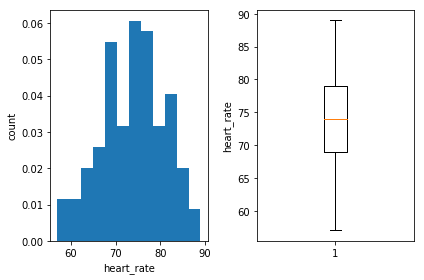

mean heart rate:  73.76153846153846


In [5]:

plt.subplot(1,2,1)
plt.hist(df['heart_rate'], bins=12, normed=True)
plt.xlabel('heart_rate')
plt.ylabel('count')
plt.subplot(1,2,2)
plt.boxplot(df['heart_rate'])
plt.ylabel('heart_rate')
plt.tight_layout()
plt.show()
print("mean heart rate: ",np.mean(df.heart_rate))

**1. Is the distribution of body temperatures normal?**
-----
Body temp distribution appears normal.  Roughly bell shaped, symetrical.  Although the small sample size might distort it a bit.  
Re-draw the histogram with a line curve over it.  Also, draw ecdf for the data, and for a normal distrtibution to show it visually appears similar:

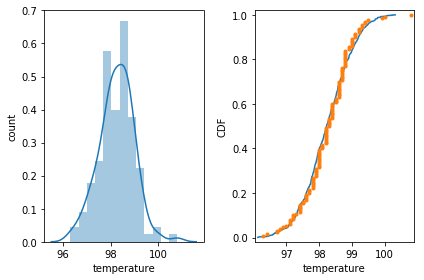

In [6]:
# left side graph: seaborn distplot draws a histogram with a line curve
plt.subplot(1,2,1)
sns.distplot(df['temperature'])
plt.xlabel('temperature')
plt.ylabel('count')

# --------

plt.subplot(1,2,2)
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n
    return x, y

mu = np.mean(df['temperature'])  #mean temperature
sigma = np.std(df['temperature'])  #standard deviation of temperature
samples = np.random.normal(mu, sigma, size=1000)

# get ECDF of data, and of the samples
x_theor, y_theor = ecdf(samples)
x, y = ecdf(df['temperature'])

# plot the CDFs
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('temperature')
_ = plt.ylabel('CDF')
plt.tight_layout()
plt.show()

In [7]:
print("Let's compare the samples to see if 68% fall within 1 std")  
print(np.percentile([df.temperature],[2.5,16,50,84,97.5]))
print(np.percentile(samples,[2.5,16,50,84,97.5]))

Let's compare the samples to see if 68% fall within 1 std
[ 96.7225  97.564   98.3     98.836   99.4775]
[ 96.7409286   97.4910753   98.22629278  98.99517101  99.68435463]


**2. Is the sample size large? Are the observations independent?**
----
*Sample size is small, given that the population is billions of people.  30 is the minimum for a t test or a z test, so it is sufficient.  
-----
There is no evidence that the observations are independent.  It is likely that the body temp and pulse rate were taken at from the same individual at the same time, so there may be some dependence.  Also, I do not know if the occurances were random, or even different people.  They may all be from a small group of people (at least two, since some are Male, some Female.)*

** 3. Is the true population mean really 98.6 degrees F?
Would you use a one-sample or two-sample test? Why?  
In this situation, is it appropriate to use the  tt  or  zz  statistic?
Now try using the other test. How is the result be different? Why?**
-----
*I'd use one sample test, because data only has one variable: temperature.
I estimate the data has normal distribution, but the population Std Dev is unknown, so I'll start with the t-test.  
Null hypothesis: population mean is 98.6; attempt to show that our data supports this.*

Perform a t-test to find the t-value.
We will use formula:  t = ( x̄ - mu) / (std / √n ).
Then perform a z-test, using formula: z = x̄

In [16]:
#calculate the t statistic
# t_value = ( mu - population mean ) / ( sigma / √len(sample) )
mu = np.mean(df['temperature'])  #mean temperature
sigma = np.std(df['temperature'])  #standard deviation of temperature
t_value = ( mu - 98.6 ) / ( sigma / (len (df['temperature'])**0.5) )
print('mean temperature: ', mu)
print('standard dev: ',sigma)
print('t-value: ', t_value)

mean temperature:  98.24923076923078
standard dev:  0.7303577789050377
t-value:  -5.475925202078116


In [34]:
# calculate the z statistic
# estimate population STD DEV by bootstrapping
# z_value = ( mu - population mean ) / sigma

# Define bootstrapping functions
def bootstrap_replicate_1d(data, func):
    """Draw one bootstrap replicate for a 1-d array of data"""
    return func(np.random.choice(data, size=len(data)))
def draw_bs_reps(data, func, size=1):
    """Draw (size) number of bootstrap replicates."""
    bs_replicates = np.empty(size)
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)
    return bs_replicates

temp_shifted = df.temperature - np.mean(df.temperature) + 98.6

def z_stat(data, mu=98.6, sigma=0.7303577789050377):
    return (np.mean(data)-mu) / (sigma / np.sqrt(len(data)))

z_obs = z_stat(df.temperature, 98.6)

bs_z_reps = draw_bs_reps(temp_shifted, z_stat, size=10000)

p_z_value = np.sum(np.abs(bs_z_reps) >= np.abs(z_obs)) / len(bs_z_reps)

print('z_value: ', z_obs)
print('p-value: ', p_z_value)

z_value:  -5.47592520208
p-value:  0.0


note: z-value is close to t_value.  98.6 is more than 5 standard deviations away from the sample mean.  Most likely, 98.6 is not the correct population mean.  (Or, possibly, our sample is not a good representation.)  The p-value is 0, showing about a 0 chance that 98.6 is the population mean, given our sample data.

**4. Draw a small sample of size 10 from the data and repeat both tests.
Which one is the correct one to use?
What do you notice? What does this tell you about the difference in application of the  tt  and  zz  statistic?**
------


In [40]:
#get a random sample of 10 observations:
np.random.seed(282)
rand_samp_temp = np.random.choice(df['temperature'], size=10)

# t-test is most appropriate when we have such a small sample, but we'll perform both.
# First, the z-test:
temp_shifted = rand_samp_temp - np.mean(rand_samp_temp) + 98.6

z_obs = z_stat(rand_samp_temp, 98.6)

bs_z_reps = draw_bs_reps(temp_shifted, z_stat, size=10000)

p_z_value = np.sum(np.abs(bs_z_reps) >= np.abs(z_obs)) / len(bs_z_reps)

print('z_value: ', z_obs)
print('p-value: ', p_z_value)

# next, the t-test:
# t_value = ( mu - population mean ) / ( sigma / √len(sample) )
mu = np.mean(rand_samp_temp)  #mean temperature
sigma = np.std(rand_samp_temp)  #standard deviation of temperature
t_value = ( mu - 98.6 ) / ( sigma / (len (rand_samp_temp)**0.5) )
print('t-value: ', t_value)

z_value:  -1.60201310653
p-value:  0.0552
t-value:  -1.92849632387


both of these show a much closer result.  They would one to believe the data supports 98.6 as a possible population mean. 

**5. At what temperature should we consider someone's temperature to be "abnormal"?
Start by computing the margin of error and confidence interval.**
-----

In [42]:
confidence_i = np.percentile(df.temperature, [2.5, 97.5])
print('95% of the data fall between: ', confidence_i[0], ' and ', confidence_i[1], 'deg F')

95% of the data fall between:  96.7225  and  99.4775 deg F


**6. Is there a significant difference between males and females in normal temperature?
What test did you use and why?
Write a story with your conclusion in the context of the original problem.**
-----

# of females:  65 # of males:  65
female temperature mean:  98.39384615384613 deg. F  and std:  0.7377464486428966
male temperature mean:  98.1046153846154 deg. F  and std:  0.6933598841828696


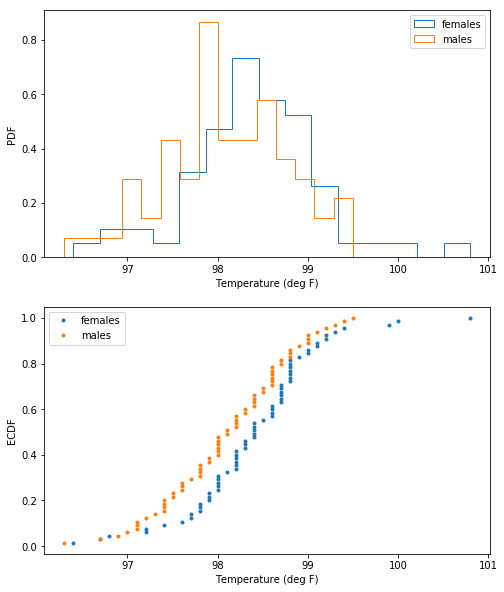

In [69]:
# Separate observations by gender
females = df[df['gender'] == 'F']
males = df[df['gender'] == 'M']

# Basics 
print('# of females: ',len(females), '# of males: ',len(males))
f_mean = np.mean(females.temperature)
f_std = np.std(females.temperature)
m_mean = np.mean(males.temperature)
m_std = np.std(males.temperature)
print('female temperature mean: ', f_mean, 'deg. F', ' and std: ', f_std)
print('male temperature mean: ', m_mean, 'deg. F', ' and std: ', m_std)

# Show ecdfs
x_female, y_female = ecdf(females.temperature)
x_male, y_male = ecdf(males.temperature)
fig = plt.figure(figsize=(8, 10))
_ = plt.subplot(2,1,1)
_ = plt.hist(females['temperature'], bins=15, normed=True, histtype='step')
_ = plt.hist(males['temperature'], bins=15, normed=True, histtype='step')
_ = plt.xlabel('Temperature (deg F)')
_ = plt.ylabel('PDF')
_ = plt.legend(('females', 'males'))

_ = plt.subplot(2,1,2)
_ = plt.plot(x_female, y_female, marker='.', linestyle='none')
_ = plt.plot(x_male, y_male, marker='.', linestyle='none')
_ = plt.ylabel('ECDF')
_ = plt.xlabel('Temperature (deg F)')
_ = plt.legend(('females', 'males'))
plt.show()


In [74]:
# NULL hypothesis: male and female distributions are equal
def diff_of_means(data_1, data_2):
    return np.mean(data_1) - np.mean(data_2)

# Compute test statistic for observed data
diff_obs = diff_of_means(females['temperature'], males['temperature'])

# Draw permutation replicates
perm_replicates = np.empty(10000)
for i in range(len(perm_replicates)): 
    # Permute the data
    both = np.concatenate((females['temperature'], males['temperature']))
    both_perm = np.random.permutation(both)
    perm_females = both_perm[:len(females)]
    perm_males = both_perm[len(females):]
    #Draw replicates
    perm_replicates[i] = diff_of_means(perm_females, perm_males)

# Compute the p-value
p_value = np.sum(abs(perm_replicates) >= abs(diff_obs)) / len(perm_replicates)

print('observed difference:',diff_obs, 'deg. F' )
print('p-value:',p_value)

observed difference: 0.289230769230727 deg. F
p-value: 0.0273


ECDF graphs show that the male and female samples are different.  
We observe a difference of 0.29 deg F.  The p-value is low, indicating a statistically significant difference between the two samples.

**CONCLUSION**
*Carl Wonderlich observed an average body temperature of 98.6 deg F.  
However, our data suggests that he is incorrect.  We find mean body temp to be 98.25, with 95% of observations between 98.23 and 98.26 deg F.  We also found a significant difference between male and female samples.  Females are about 0.29 deg F warmer.  
Carl Wonderlich's observed temperature is much warmer, and unlikely to be correct.*